In [1]:
import sys
import os
current_dir = os.getcwd()
print(current_dir)


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all


In [2]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['../../../../UCB-USACE-LSTMs', '/Users/canruso/Applications/DataSpell.app/Contents/plugins/python-ce/helpers-pro/jupyter_debug', '/Users/canruso/Applications/DataSpell.app/Contents/plugins/python-ce/helpers/pydev', '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all', '/Users/canruso/Desktop', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python310.zip', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/lib-dynload', '', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages/setuptools/_vendor']


In [3]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

## Set up Working Directory

In [4]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'calpella_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("calpella")) #each basin has its own train basin file, so change for different basins e.g "guerneville", etc.
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all
Train Basin File Exists: True


In [5]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("calpella_gage.yaml") #update the yaml file for different basins

## Standard daily LSTM (no ensembles, no physics), train on training subset, evaluated on validation period

In [6]:
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False)

In [7]:
lstmNoPhysicsDaily.train()

2025-02-08 16:35:31,945: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163531/output.log initialized.
2025-02-08 16:35:31,945: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163531
2025-02-08 16:35:31,945: ### Run configurations for testing_run
2025-02-08 16:35:31,946: experiment_name: testing_run
2025-02-08 16:35:31,946: train_basin_file: calpella
2025-02-08 16:35:31,946: validation_basin_file: calpella
2025-02-08 16:35:31,947: test_basin_file: calpella
2025-02-08 16:35:31,947: train_start_date: 1994-10-01 00:00:00
2025-02-08 16:35:31,947: train_end_date: 2002-09-30 00:00:00
2025-02-08 16:35:31,948: validation_start_date: 2002-10-01 00:00:00
2025-02-08 16:35:31,948: validation_end_date: 2005-09-30 00:00:00
2025-02-08 16:35:31,948: test_start_date: 2005-10-01 00:00:00
2025-02-08 16:35:31,949: test_end_date: 2009-09-30 00:00:00
2025-02-08 16:35:31,949

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]
2025-02-08 16:35:45,413: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163531/validation/model_epoch008/validation_metrics.csv
2025-02-08 16:35:45,414: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163531/validation/model_epoch008/validation_results.p


PosixPath('/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163531')

got predictions


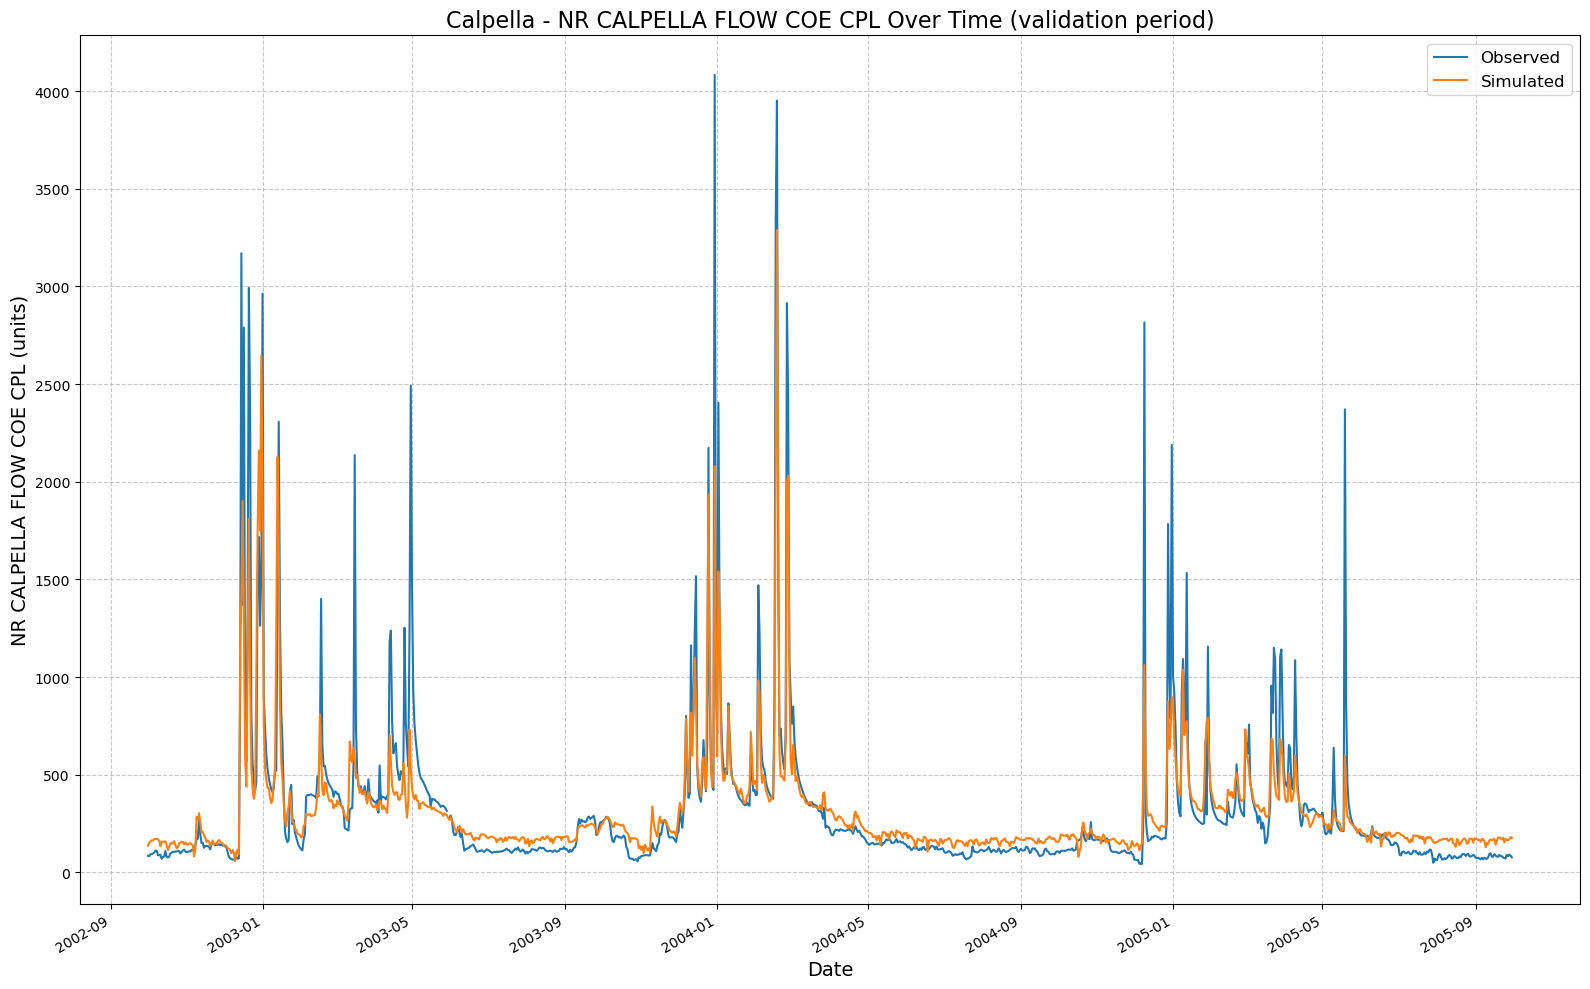

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163531/results_output_validation.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.731247752904892,
 'MSE': 46040.0234375,
 'RMSE': 214.56939072826768,
 'KGE': 0.6623853197297149,
 'Alpha-NSE': 0.6863492672545304,
 'Beta-KGE': 0.9849762916564941,
 'Beta-NSE': -0.011494221516094978,
 'Pearson-r': 0.8759791212341806,
 'FHV': -27.25045084953308,
 'FMS': -35.03529589477034,
 'FLV': -23.69972635874914,
 'Peak-Timing': 0.4,
 'Peak-MAPE': 64.03214931488037}

In [8]:
#outputs simple graph, also logs where the csv where the results are stored (use this csv for when you plot combined graph), also prints the metrics
lstmNoPhysicsDaily.results() 

## Physics-Informed LSTM (PLSTM) trained on training set, validated on validation set


In [9]:
path_to_physics_data = Path(library_path +"/russian_river_data/Calpella_daily.csv")
params = {
    "epochs":8,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
#    'Lake Mendocino Storage',
    ]
lstmPhysicsDaily = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False)

In [10]:
lstmPhysicsDaily.train()

2025-02-08 16:37:44,314: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163744/output.log initialized.
2025-02-08 16:37:44,315: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163744
2025-02-08 16:37:44,315: ### Run configurations for testing_run
2025-02-08 16:37:44,316: experiment_name: testing_run
2025-02-08 16:37:44,316: train_basin_file: calpella
2025-02-08 16:37:44,316: validation_basin_file: calpella
2025-02-08 16:37:44,316: test_basin_file: calpella
2025-02-08 16:37:44,317: train_start_date: 1994-10-01 00:00:00
2025-02-08 16:37:44,317: train_end_date: 2002-09-30 00:00:00
2025-02-08 16:37:44,317: validation_start_date: 2002-10-01 00:00:00
2025-02-08 16:37:44,318: validation_end_date: 2005-09-30 00:00:00
2025-02-08 16:37:44,318: test_start_date: 2005-10-01 00:00:00
2025-02-08 16:37:44,318: test_end_date: 2009-09-30 00:00:00
2025-02-08 16:37:44,318

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimen

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]
2025-02-08 16:37:56,123: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163744/validation/model_epoch008/validation_metrics.csv
2025-02-08 16:37:56,124: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163744/validation/model_epoch008/validation_results.p


PosixPath('/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163744')

got predictions


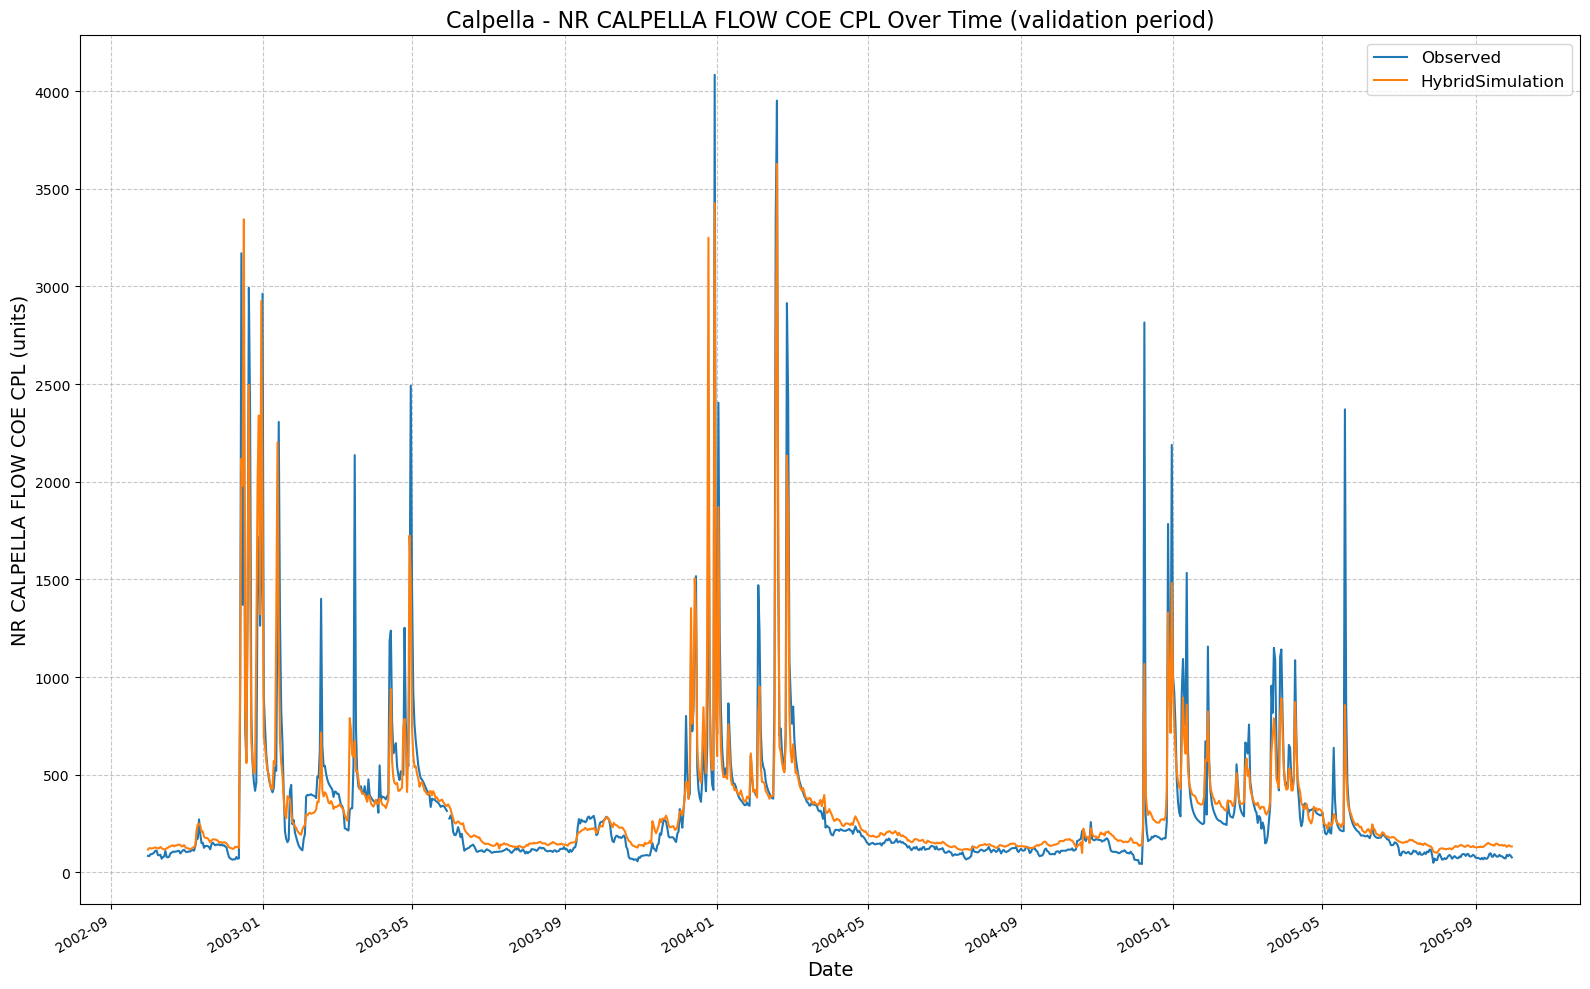

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163744/results_output_validation.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.8276197612285614,
 'MSE': 29530.505859375,
 'RMSE': 171.84442341657467,
 'KGE': 0.8146708695706311,
 'Alpha-NSE': 0.838088017935265,
 'Beta-KGE': 1.023695707321167,
 'Beta-NSE': 0.018128886343973267,
 'Pearson-r': 0.9129947696737457,
 'FHV': -12.523430585861206,
 'FMS': -21.617478660972257,
 'FLV': 60.82777595418748,
 'Peak-Timing': 0.2,
 'Peak-MAPE': 43.014159202575684}

In [11]:
lstmPhysicsDaily.results()

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: Futu

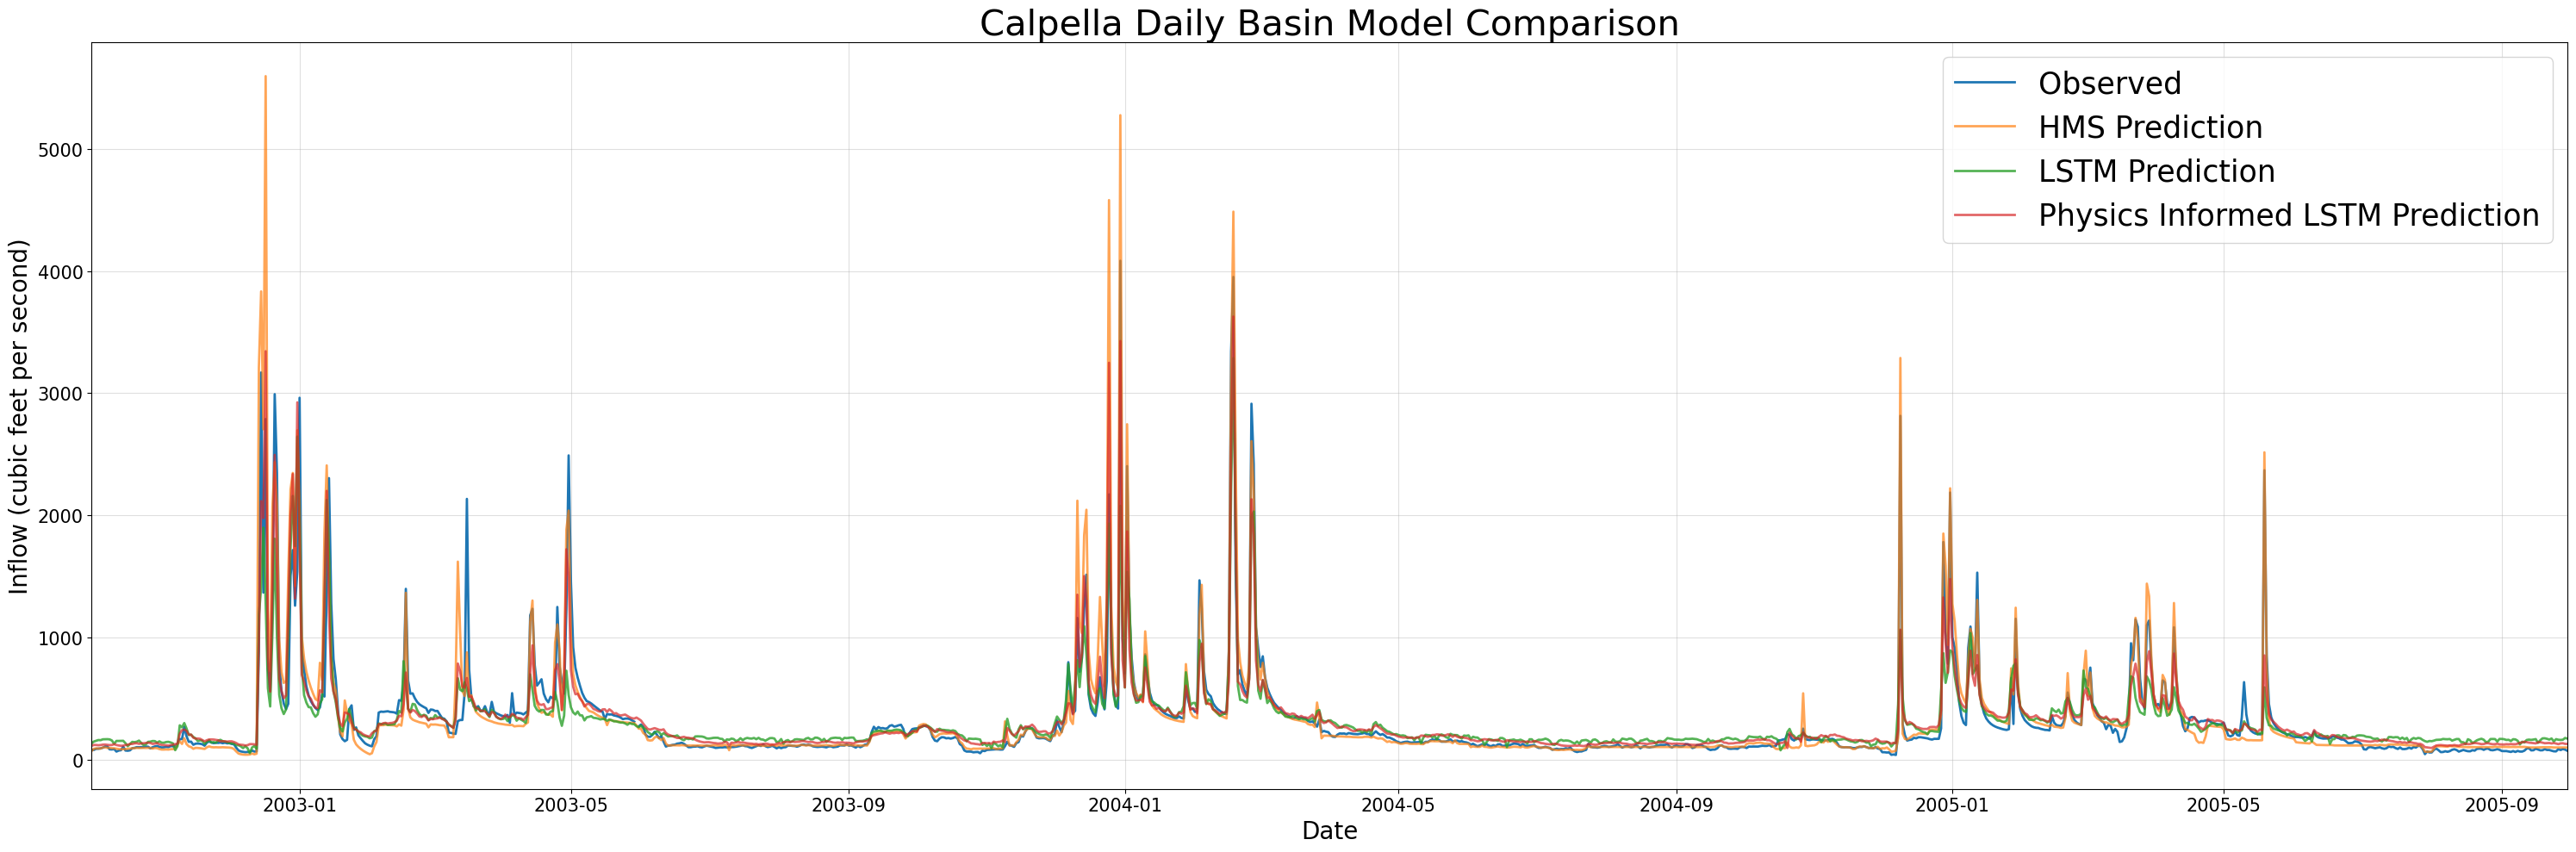

In [13]:
lstm_results_path = '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163531/results_output_validation.csv'
lstmPhysics_results_path = '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_163744/results_output_validation.csv'
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Calpella Daily Basin Model Comparison', fName = "calpella_daily_eval_metrics.csv")

In [14]:
metrics_df

HMS          LSTM  Physics_Informed_LSTM
NSE              0.749141      0.731248               0.827620
MSE          42974.708479  46040.022797           29530.506432
RMSE           207.303421    214.569389             171.844425
KGE              0.757358      0.662385               0.814671
Alpha-NSE        1.223982      0.686349               0.838088
Beta-KGE         1.045461      0.984976               1.023696
Beta-NSE         0.034781     -0.011494               0.018129
Pearson-r        0.918511      0.875979               0.912995
FHV             19.067588    -27.250455             -12.523433
FMS             -9.037004    -35.035281             -21.617531
FLV             -1.494492    -23.699760              60.827752
Peak-Timing      0.000000      0.400000               0.200000
Peak-MAPE       18.226080     64.032147              43.014159

## If you prefer the interactive plotly graph , you can use 'fancyCombinedPlot' (must have plotly library downloaded)

In [15]:
#lstm_results_path = '/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0402_164712/results_output_validation.csv'
#lstmPhysics_results_path = '/Users/mia/research/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0402_173955/results_output_validation.csv'
path_to_physics_data = Path(library_path +"/russian_river_data/Calpella_daily.csv")

In [16]:
fancyCombinedPlot(lstm_results=lstm_results_path, lstmPhysics_results= lstmPhysics_results_path, HMS_results=path_to_physics_data, title='Calpella Basin Daily Model Comparison', fName = "calpella_daily_eval_metrics.csv")

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: Futu

HMS          LSTM  Physics_Informed_LSTM
NSE              0.749141      0.731248               0.827620
MSE          42974.708479  46040.022797           29530.506432
RMSE           207.303421    214.569389             171.844425
KGE              0.757358      0.662385               0.814671
Alpha-NSE        1.223982      0.686349               0.838088
Beta-KGE         1.045461      0.984976               1.023696
Beta-NSE         0.034781     -0.011494               0.018129
Pearson-r        0.918511      0.875979               0.912995
FHV             19.067588    -27.250455             -12.523433
FMS             -9.037004    -35.035281             -21.617531
FLV             -1.494492    -23.699760              60.827752
Peak-Timing      0.000000      0.400000               0.200000
Peak-MAPE       18.226080     64.032147              43.014159

## Re-train standard daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [25]:
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
lstmNoPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, hourly=False, extend_train_period=True)

In [26]:
lstmNoPhysicsDailyExt.train()

2025-02-08 16:49:34,355: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164934/output.log initialized.
2025-02-08 16:49:34,356: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164934
2025-02-08 16:49:34,357: ### Run configurations for testing_run
2025-02-08 16:49:34,357: experiment_name: testing_run
2025-02-08 16:49:34,357: train_basin_file: calpella
2025-02-08 16:49:34,357: validation_basin_file: calpella
2025-02-08 16:49:34,358: test_basin_file: calpella
2025-02-08 16:49:34,358: train_start_date: 1994-10-01 00:00:00
2025-02-08 16:49:34,358: train_end_date: 2005-09-30 00:00:00
2025-02-08 16:49:34,359: validation_start_date: 2002-10-01 00:00:00
2025-02-08 16:49:34,359: validation_end_date: 2005-09-30 00:00:00
2025-02-08 16:49:34,359: test_start_date: 2005-10-01 00:00:00
2025-02-08 16:49:34,359: test_end_date: 2009-09-30 00:00:00
2025-02-08 16:49:34,360

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]
2025-02-08 16:50:05,639: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164934/validation/model_epoch016/validation_metrics.csv
2025-02-08 16:50:05,640: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164934/validation/model_epoch016/validation_results.p


PosixPath('/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164934')

2025-02-08 16:44:28,868: Using the model weights from /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164357/model_epoch016.pt


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]
2025-02-08 16:44:29,354: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164357/test/model_epoch016/test_metrics.csv
2025-02-08 16:44:29,355: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164357/test/model_epoch016/test_results.p
got predictions


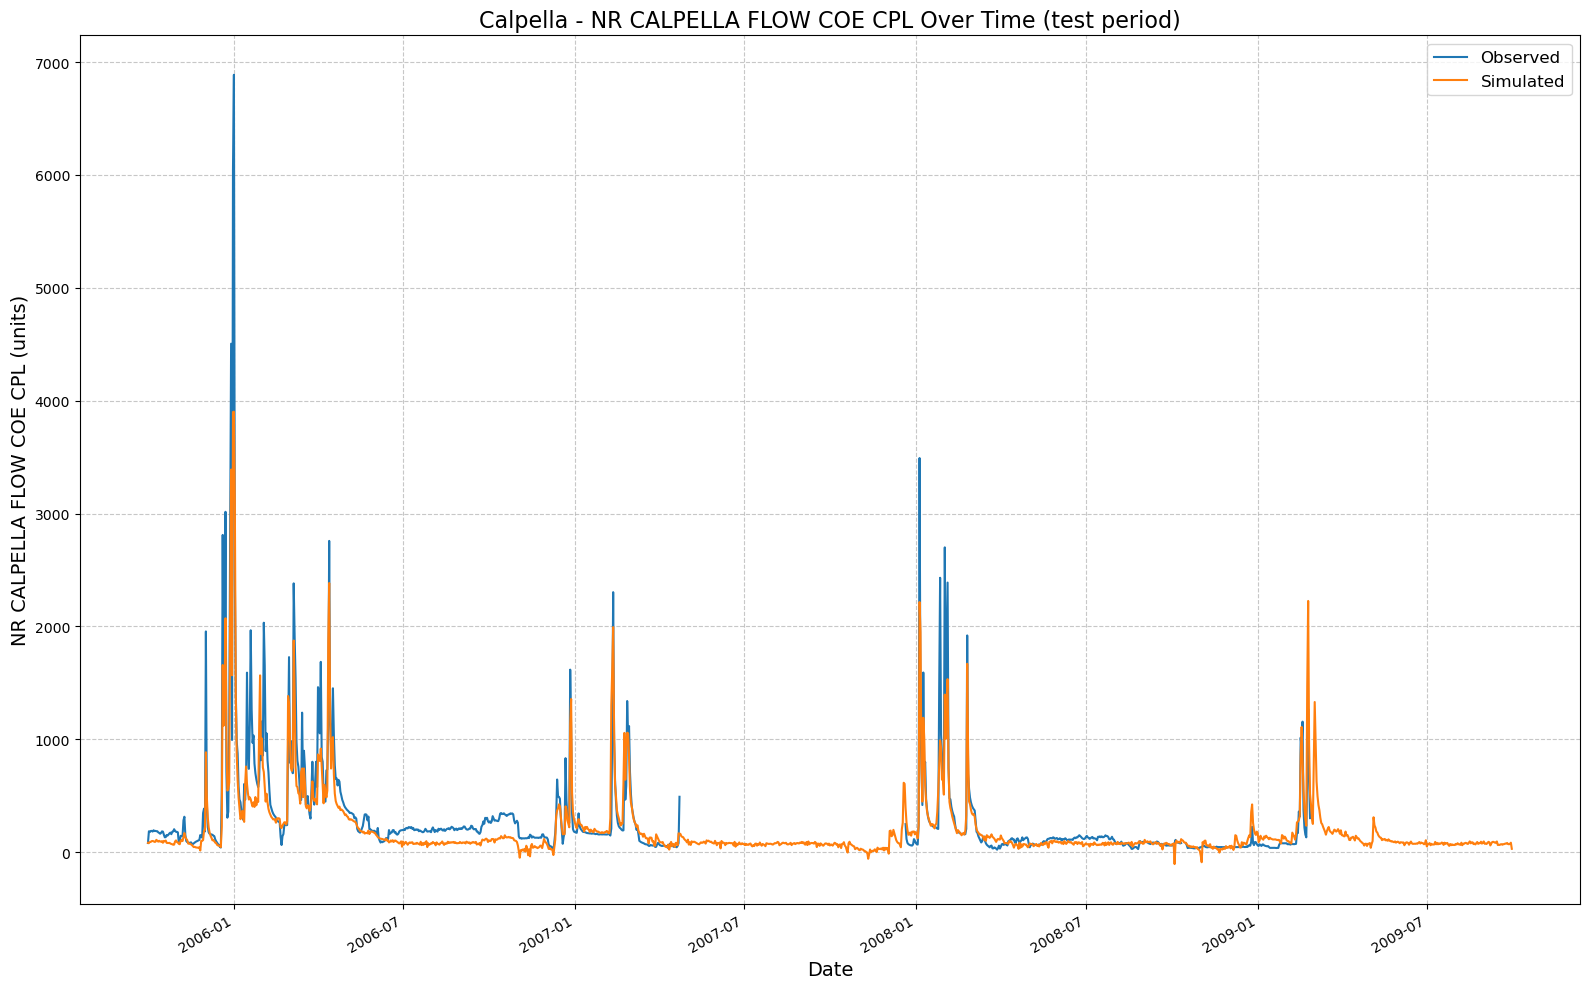

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164357/results_output_test.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.7907644063234329,
 'MSE': 53244.5625,
 'RMSE': 230.7478331425888,
 'KGE': 0.6795125538947411,
 'Alpha-NSE': 0.7543553091089634,
 'Beta-KGE': 0.8153126239776611,
 'Beta-NSE': -0.10846032606522381,
 'Pearson-r': 0.9091074145702654,
 'FHV': -24.741296470165253,
 'FMS': 0.2334727174300555,
 'FLV': -951.3626989349414,
 'Peak-Timing': 0.25,
 'Peak-MAPE': 39.760074615478516}

In [19]:
lstmNoPhysicsDailyExt.results('test')

## Re-train physics daily LSTM (no ensembles, no physics) on entire dataset, evaluate on test period

In [20]:
path_to_physics_data = Path(library_path +"/russian_river_data/Calpella_daily.csv")
params = {
    "epochs":16,
    "hidden_size": 128,
    "output_dropout": 0.4,
    "seq_length": 90,
}
features_with_physics = [
    #from hourly
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
#    'Lake Mendocino Storage',
    ]
lstmPhysicsDailyExt = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data, hourly=False, extend_train_period=True)

In [21]:
lstmPhysicsDailyExt.train()

2025-02-08 16:44:29,603: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429/output.log initialized.
2025-02-08 16:44:29,604: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429
2025-02-08 16:44:29,604: ### Run configurations for testing_run
2025-02-08 16:44:29,604: experiment_name: testing_run
2025-02-08 16:44:29,604: train_basin_file: calpella
2025-02-08 16:44:29,605: validation_basin_file: calpella
2025-02-08 16:44:29,605: test_basin_file: calpella
2025-02-08 16:44:29,605: train_start_date: 1994-10-01 00:00:00
2025-02-08 16:44:29,605: train_end_date: 2005-09-30 00:00:00
2025-02-08 16:44:29,606: validation_start_date: 2002-10-01 00:00:00
2025-02-08 16:44:29,606: validation_end_date: 2005-09-30 00:00:00
2025-02-08 16:44:29,606: test_start_date: 2005-10-01 00:00:00
2025-02-08 16:44:29,606: test_end_date: 2009-09-30 00:00:00
2025-02-08 16:44:29,607

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]
2025-02-08 16:45:00,766: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429/validation/model_epoch016/validation_metrics.csv
2025-02-08 16:45:00,767: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429/validation/model_epoch016/validation_results.p


PosixPath('/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429')

2025-02-08 16:45:00,781: Using the model weights from /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429/model_epoch016.pt


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experime

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]
2025-02-08 16:45:01,306: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429/test/model_epoch016/test_metrics.csv
2025-02-08 16:45:01,307: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429/test/model_epoch016/test_results.p
got predictions


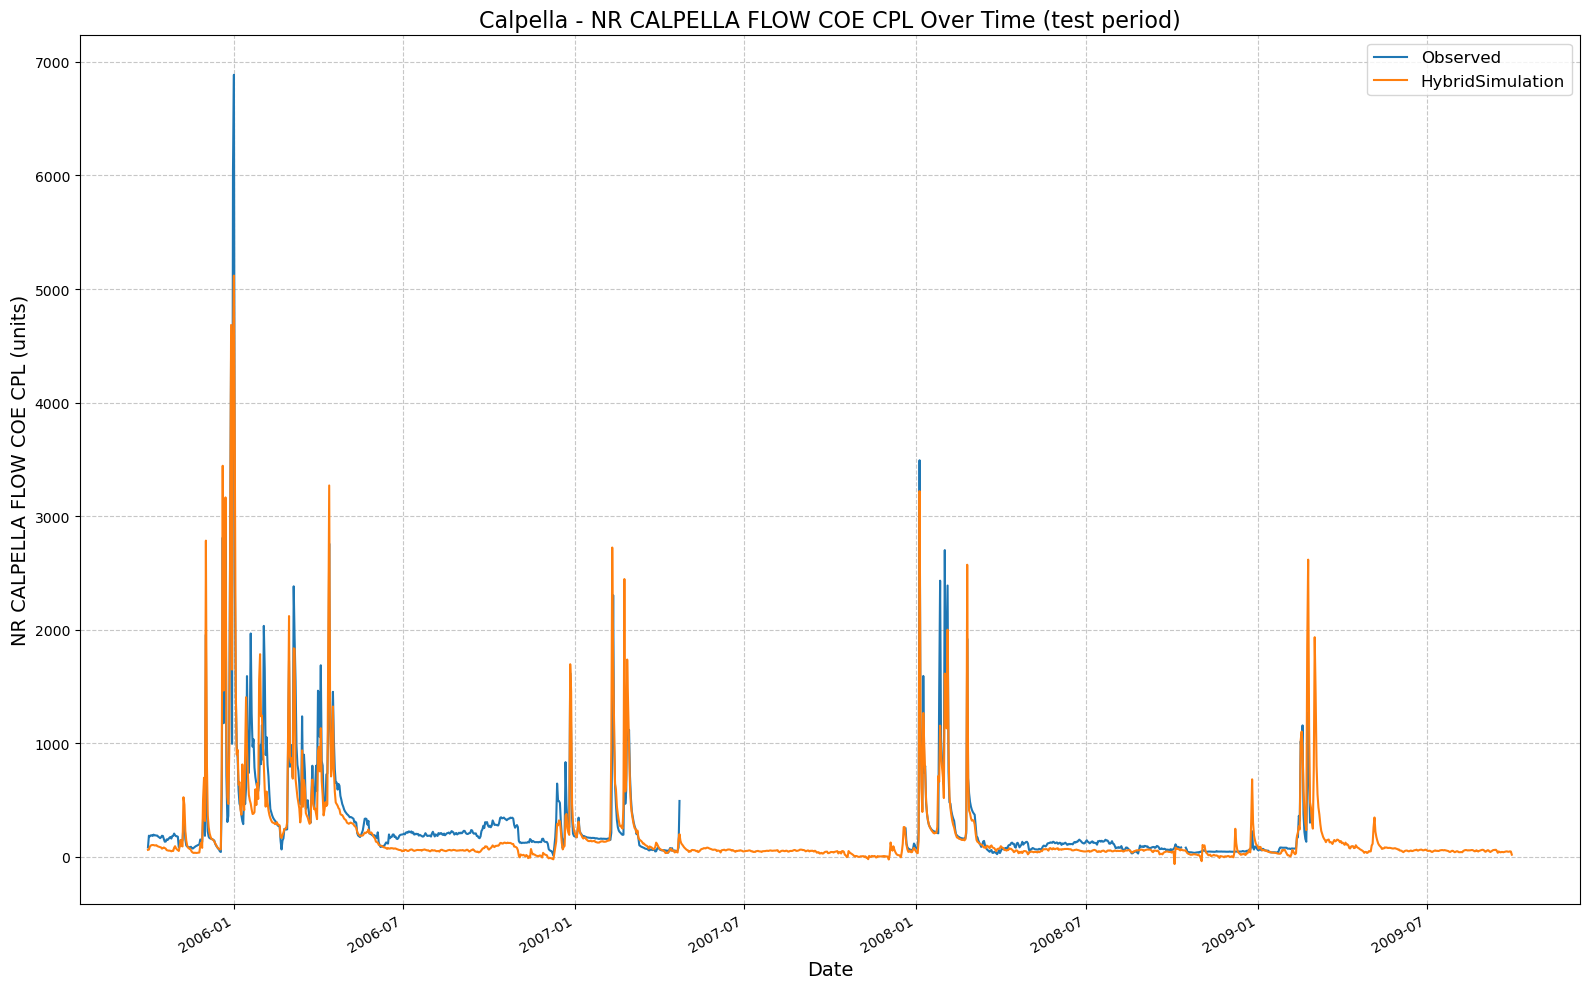

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429/results_output_test.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



{'NSE': 0.8146898299455643,
 'MSE': 47156.21875,
 'RMSE': 217.154826679031,
 'KGE': 0.804519236867723,
 'Alpha-NSE': 0.9735065880381609,
 'Beta-KGE': 0.8282914757728577,
 'Beta-NSE': -0.10083831204370897,
 'Pearson-r': 0.910406414375054,
 'FHV': -0.2861520741134882,
 'FMS': 30.70259537166391,
 'FLV': -866.8428898764207,
 'Peak-Timing': 0.0,
 'Peak-MAPE': 32.62921333312988}

In [22]:
lstmPhysicsDailyExt.results('test')

## compare results

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB

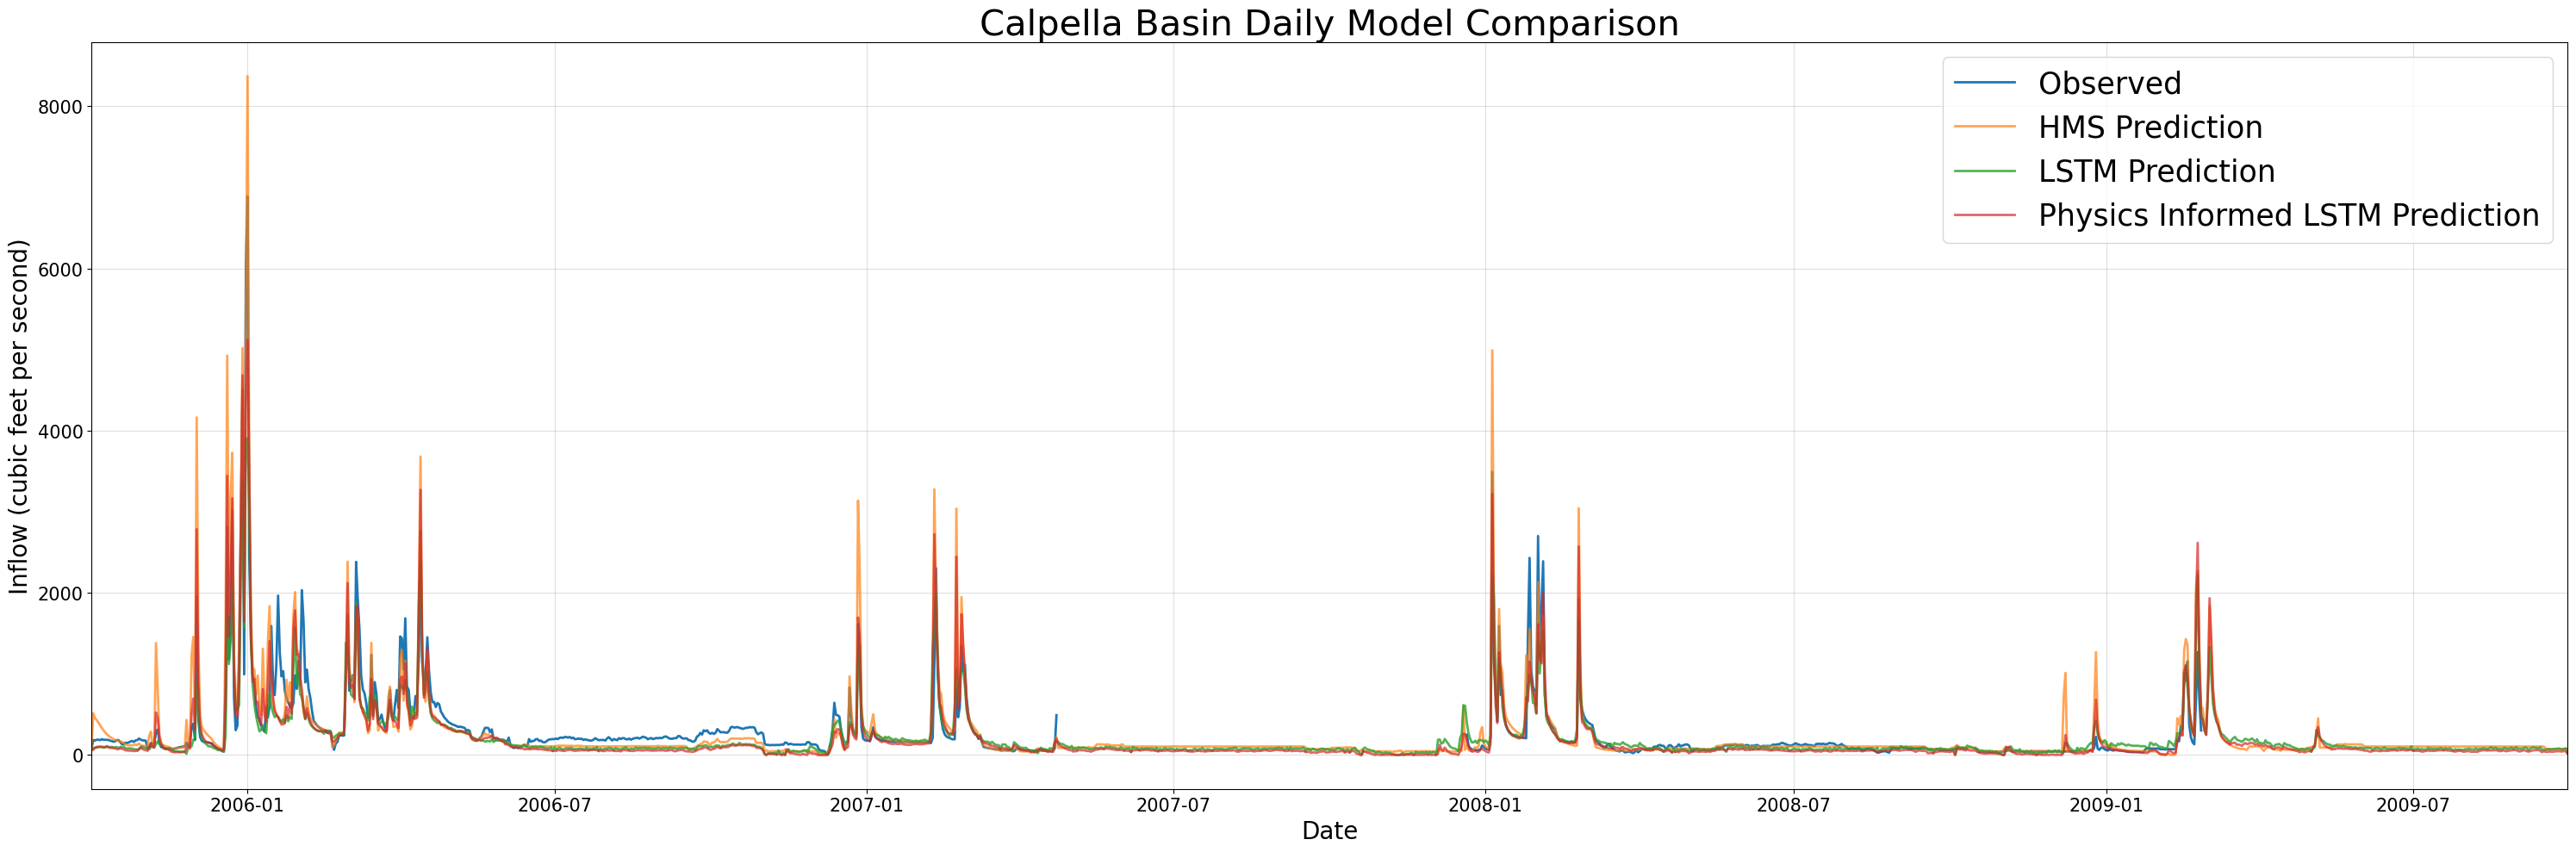

In [30]:
lstm_results_path_ext = '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164357/results_output_test.csv'
lstmPhysics_results_path_ext = '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/runs/testing_run_0802_164429/results_output_test.csv'
myplot, metrics_df = combinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Calpella Basin Daily Model Comparison', fName = "calpella_daily_metrics.csv")

In [31]:
metrics_df

HMS          LSTM  Physics_Informed_LSTM
NSE              0.699238      0.791098               0.814874
MSE          76535.402184  53159.547587           47109.319509
RMSE           276.650325    230.563543             217.046814
KGE              0.746450      0.679885               0.805369
Alpha-NSE        1.224663      0.753823               0.973193
Beta-KGE         1.058923      0.816560               0.829302
Beta-NSE         0.034604     -0.107728              -0.100245
Pearson-r        0.898302      0.909333               0.910419
FHV             25.593700    -24.741296              -0.286152
FMS             -0.006060      0.233435              30.702600
FLV           -969.769933   -951.362601            -866.842790
Peak-Timing      0.000000      0.250000               0.000000
Peak-MAPE       54.234118     39.760074              32.629212

In [32]:
fancyCombinedPlot(lstm_results=lstm_results_path_ext, lstmPhysics_results= lstmPhysics_results_path_ext, HMS_results=path_to_physics_data, title='Calpella Basin Daily Model Comparison', fName = "calpella_daily_metrics.csv")

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/calpella_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB

HMS          LSTM  Physics_Informed_LSTM
NSE              0.699238      0.791098               0.814874
MSE          76535.402184  53159.547587           47109.319509
RMSE           276.650325    230.563543             217.046814
KGE              0.746450      0.679885               0.805369
Alpha-NSE        1.224663      0.753823               0.973193
Beta-KGE         1.058923      0.816560               0.829302
Beta-NSE         0.034604     -0.107728              -0.100245
Pearson-r        0.898302      0.909333               0.910419
FHV             25.593700    -24.741296              -0.286152
FMS             -0.006060      0.233435              30.702600
FLV           -969.769933   -951.362601            -866.842790
Peak-Timing      0.000000      0.250000               0.000000
Peak-MAPE       54.234118     39.760074              32.629212